In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image

import torch

from skimage.metrics import mean_squared_error as mse
from skimage import io

import cv2 as cv

import time

import random
random.seed(15)

from codes import my_loader
from  codes import my_utils 

from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

from codes.GAN_class import DownsampleGAN


print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

True


In [2]:
train_loader, validation_loader = my_loader.my_load_creator()

export CUDA_VISIBLE_DEVICES=0,1,2,3
Disabled distributed training.
Path already exists. Rename it to [/home/ezgor/IIT/experiments/001_TOF_scratch_lr1e-4_150k_RealVSR_3frame_WiCutBlur_YCbCr_CB_archived_220414-151512]


22-04-14 15:15:12.503 - INFO:   name: 001_TOF_scratch_lr1e-4_150k_RealVSR_3frame_WiCutBlur_YCbCr_CB
  use_tb_logger: True
  model: VideoSR_AllPair_YCbCr_Combine
  distortion: sr
  scale: 1
  gpu_ids: [0, 1, 2, 3]
  datasets:[
    train:[
      name: RealVSR_Train
      mode: RealVSR_AllPair
      interval_list: [1]
      random_reverse: False
      border_mode: False
      dataroot_GT: /home/ezgor/datasets/RealVSR/GT
      dataroot_LQ: /home/ezgor/datasets/RealVSR/LQ
      cache_keys: ./keys/realvsr_keys.pkl
      remove_list: ./keys/remove_seqs.pkl
      N_frames: 1
      use_shuffle: True
      n_workers: 3
      batch_size: 32
      GT_size: 192
      LQ_size: 192
      use_flip: True
      use_rot: True
      color: ycbcr
      phase: train
      scale: 1
      data_type: img
    ]
    val:[
      name: RealVSR_Test
      mode: VideoTest
      dataroot_GT: /home/ezgor/datasets/RealVSR/GT_test
      dataroot_LQ: /home/ezgor/datasets/RealVSR/LQ_test
      cache_data: False
      GT_s

horosh


22-04-14 15:15:13.205 - INFO: Dataset [VideoTestDataset - RealVSR_Test] is created.
22-04-14 15:15:13.206 - INFO: Number of val images in [RealVSR_Test]: 2500


In [5]:
dwsGAN = DownsampleGAN(train_loader=train_loader, 
                       validation_loader=validation_loader,
                       device=device,
                       weights_path='./weights/checkpoints3',
                       models_path='./saved_models/checkpoints3',
                       epochs=8)

In [32]:
dwsGAN.fit()

1it [00:33, 33.40s/it]

[1/8][0/703]	Loss_D: 1.3601	Loss_G: 2.1563


101it [05:00,  2.22s/it]

[1/8][100/703]	Loss_D: 1.3585	Loss_G: 2.1222


201it [09:40,  2.72s/it]

[1/8][200/703]	Loss_D: 1.3674	Loss_G: 1.8696


301it [13:56,  2.10s/it]

[1/8][300/703]	Loss_D: 1.3507	Loss_G: 2.0625


401it [18:29,  1.74s/it]

[1/8][400/703]	Loss_D: 1.3836	Loss_G: 2.1730


501it [22:45,  1.34s/it]

[1/8][500/703]	Loss_D: 1.3782	Loss_G: 2.1058


601it [27:20,  1.93s/it]

[1/8][600/703]	Loss_D: 1.3806	Loss_G: 1.8667


701it [31:32,  1.26s/it]

[1/8][700/703]	Loss_D: 1.3723	Loss_G: 1.8699


703it [31:35,  2.70s/it]
1it [00:31, 31.81s/it]

[2/8][0/703]	Loss_D: 1.3639	Loss_G: 2.0667


101it [05:10,  2.81s/it]

[2/8][100/703]	Loss_D: 1.3883	Loss_G: 1.7895


201it [09:28,  1.80s/it]

[2/8][200/703]	Loss_D: 1.3656	Loss_G: 1.8551


301it [13:49,  1.40s/it]

[2/8][300/703]	Loss_D: 1.3677	Loss_G: 2.0292


401it [18:34,  2.77s/it]

[2/8][400/703]	Loss_D: 1.3782	Loss_G: 2.0449


501it [23:03,  1.61s/it]

[2/8][500/703]	Loss_D: 1.3730	Loss_G: 1.8093


601it [27:31,  1.79s/it]

[2/8][600/703]	Loss_D: 1.3573	Loss_G: 1.8581


701it [31:42,  1.26s/it]

[2/8][700/703]	Loss_D: 1.3719	Loss_G: 2.2960


703it [31:45,  2.71s/it]
1it [00:27, 27.91s/it]

[3/8][0/703]	Loss_D: 1.3672	Loss_G: 1.7277


101it [05:00,  6.04s/it]

[3/8][100/703]	Loss_D: 1.3912	Loss_G: 1.6918


201it [09:19,  2.33s/it]

[3/8][200/703]	Loss_D: 1.3731	Loss_G: 1.8513


301it [13:40,  1.48s/it]

[3/8][300/703]	Loss_D: 1.3737	Loss_G: 1.6690


401it [18:24,  8.43s/it]

[3/8][400/703]	Loss_D: 1.3702	Loss_G: 1.5896


501it [22:32,  1.84s/it]

[3/8][500/703]	Loss_D: 1.3923	Loss_G: 1.9799


601it [27:09,  1.39s/it]

[3/8][600/703]	Loss_D: 1.3708	Loss_G: 1.6293


701it [31:30,  1.26s/it]

[3/8][700/703]	Loss_D: 1.3684	Loss_G: 2.0053


703it [31:34,  2.69s/it]
1it [00:31, 31.01s/it]

[4/8][0/703]	Loss_D: 1.3851	Loss_G: 2.1779


101it [05:06,  5.82s/it]

[4/8][100/703]	Loss_D: 1.3763	Loss_G: 2.0131


201it [09:32,  2.51s/it]

[4/8][200/703]	Loss_D: 1.3769	Loss_G: 1.9840


301it [14:02,  1.50s/it]

[4/8][300/703]	Loss_D: 1.3828	Loss_G: 1.8992


401it [18:47,  6.16s/it]

[4/8][400/703]	Loss_D: 1.3732	Loss_G: 1.7817


501it [23:19,  2.28s/it]

[4/8][500/703]	Loss_D: 1.3719	Loss_G: 2.3200


601it [27:45,  1.43s/it]

[4/8][600/703]	Loss_D: 1.3692	Loss_G: 1.8406


701it [32:09,  1.26s/it]

[4/8][700/703]	Loss_D: 1.3707	Loss_G: 1.8531


703it [32:12,  2.75s/it]
1it [00:33, 33.46s/it]

[5/8][0/703]	Loss_D: 1.3604	Loss_G: 1.8325


101it [04:58,  2.48s/it]

[5/8][100/703]	Loss_D: 1.3912	Loss_G: 2.0210


201it [09:21,  1.61s/it]

[5/8][200/703]	Loss_D: 1.3755	Loss_G: 1.6748


301it [14:08,  6.05s/it]

[5/8][300/703]	Loss_D: 1.3886	Loss_G: 2.0564


401it [18:42,  2.69s/it]

[5/8][400/703]	Loss_D: 1.3794	Loss_G: 1.8697


501it [23:12,  1.63s/it]

[5/8][500/703]	Loss_D: 1.3487	Loss_G: 1.7340


601it [27:51,  5.22s/it]

[5/8][600/703]	Loss_D: 1.3704	Loss_G: 1.7925


701it [31:49,  1.25s/it]

[5/8][700/703]	Loss_D: 1.3761	Loss_G: 1.8676


703it [31:52,  2.72s/it]
1it [00:36, 36.90s/it]

[6/8][0/703]	Loss_D: 1.3787	Loss_G: 1.8515


101it [04:49,  2.87s/it]

[6/8][100/703]	Loss_D: 1.3733	Loss_G: 1.6533


201it [09:24,  2.76s/it]

[6/8][200/703]	Loss_D: 1.3593	Loss_G: 2.0467


301it [13:41,  1.56s/it]

[6/8][300/703]	Loss_D: 1.3840	Loss_G: 2.0747


401it [18:23,  6.59s/it]

[6/8][400/703]	Loss_D: 1.3690	Loss_G: 1.5884


501it [22:53,  3.34s/it]

[6/8][500/703]	Loss_D: 1.3735	Loss_G: 2.1730


601it [27:19,  1.52s/it]

[6/8][600/703]	Loss_D: 1.3831	Loss_G: 1.7445


701it [31:42,  1.26s/it]

[6/8][700/703]	Loss_D: 1.3622	Loss_G: 1.7405


703it [31:45,  2.71s/it]
1it [00:38, 38.69s/it]

[7/8][0/703]	Loss_D: 1.3669	Loss_G: 2.0898


101it [05:12,  4.96s/it]

[7/8][100/703]	Loss_D: 1.3626	Loss_G: 1.6062


201it [09:44,  2.20s/it]

[7/8][200/703]	Loss_D: 1.3731	Loss_G: 1.8250


301it [14:09,  1.41s/it]

[7/8][300/703]	Loss_D: 1.3543	Loss_G: 1.8403


401it [18:47,  2.06s/it]

[7/8][400/703]	Loss_D: 1.3739	Loss_G: 1.9054


501it [23:05,  1.46s/it]

[7/8][500/703]	Loss_D: 1.3682	Loss_G: 1.8075


601it [27:51,  6.20s/it]

[7/8][600/703]	Loss_D: 1.3654	Loss_G: 1.6787


701it [31:51,  1.24s/it]

[7/8][700/703]	Loss_D: 1.3661	Loss_G: 1.8072


703it [31:54,  2.72s/it]
1it [00:34, 34.34s/it]

[8/8][0/703]	Loss_D: 1.3961	Loss_G: 1.8730


101it [04:51,  2.36s/it]

[8/8][100/703]	Loss_D: 1.3782	Loss_G: 1.8387


201it [09:11,  1.52s/it]

[8/8][200/703]	Loss_D: 1.3665	Loss_G: 1.6327


301it [13:58,  6.91s/it]

[8/8][300/703]	Loss_D: 1.3691	Loss_G: 1.6362


401it [18:33,  2.43s/it]

[8/8][400/703]	Loss_D: 1.3722	Loss_G: 1.8604


501it [22:45,  1.54s/it]

[8/8][500/703]	Loss_D: 1.3773	Loss_G: 2.1523


601it [27:45,  5.94s/it]

[8/8][600/703]	Loss_D: 1.3776	Loss_G: 1.9129


701it [31:57,  1.39s/it]

[8/8][700/703]	Loss_D: 1.3826	Loss_G: 1.8392


703it [32:00,  2.73s/it]


In [8]:
testGAN = my_utils.load_model('./saved_models/checkpoints3/mod_9')

0.07159423828125


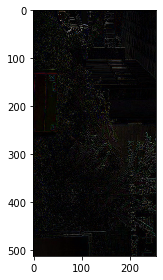

In [9]:
torch.cuda.empty_cache()
with torch.no_grad():
    idx = 534
    x = validation_loader.dataset[idx]
    img = np.array(x['GT'])
    inp = torch.tensor(my_utils.get_in(img)).float()
    inp = inp.resize(1, inp.size(0), inp.size(1), inp.size(2))
    HR_inp = my_utils.add_noise(inp, [inp.size(2), inp.size(3)]).to(device)
    t0 = time.time()
    res = gan.generator(HR_inp)
    t1 = time.time()
    res = my_utils.get_out(res.detach().cpu().numpy()[0])
    plt.grid(False)
    io.imshow(abs(res - np.array(x['LQ'])))
    print(t1 - t0)

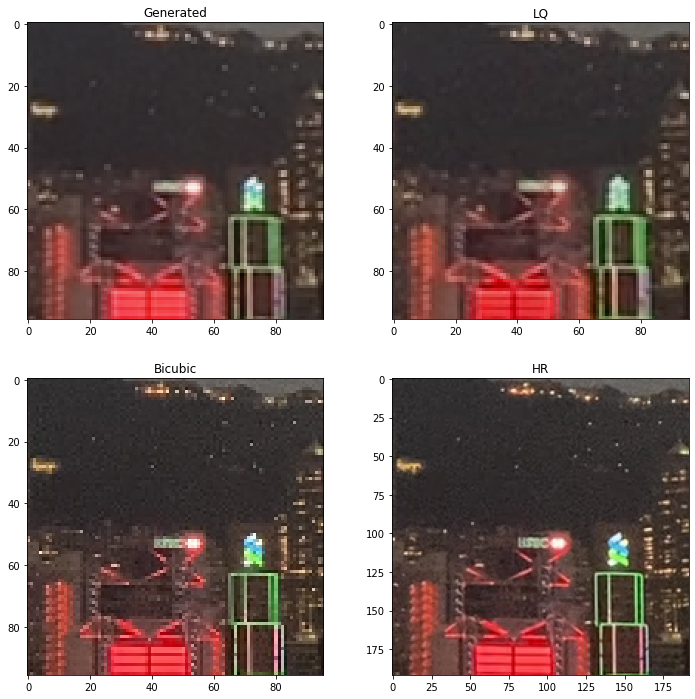

True

In [15]:
legend = ['Generated', 'LQ', 'Bicubic', 'HR']
i = random.randint(0, len(train_loader.dataset))
x = train_loader.dataset[i]
HR = my_utils.add_noise(x['GT'], (192, 192))
dim = (x['GT'].size()[2] // 2, x['GT'].size()[3] // 2)
BC = np.clip(cv.resize(my_utils.get_out(x['GT'][0].detach().cpu().numpy()), dim,  interpolation=cv.INTER_CUBIC), 0, 1)
out = [my_utils.get_out(testGAN.generator(HR.to(device)).detach().cpu().numpy()[0]), my_utils.get_out(x['LQs'][0].detach().cpu().numpy()), BC, my_utils.get_out(x['GT'][0].detach().cpu().numpy())]

_, axs = plt.subplots(ncols=len(out) // 2, nrows=len(out) // 2, figsize=(12, 12))
for i in range(len(out) // 2):
    for j in range(len(out) // 2):
        axs[i][j].imshow((out[j + i * (len(out) // 2)]))
        axs[i][j].grid(False)
        axs[i][j].set_title(legend[j + i * (len(out) // 2)])
plt.show()

cv.imwrite('test.png', out[0])  

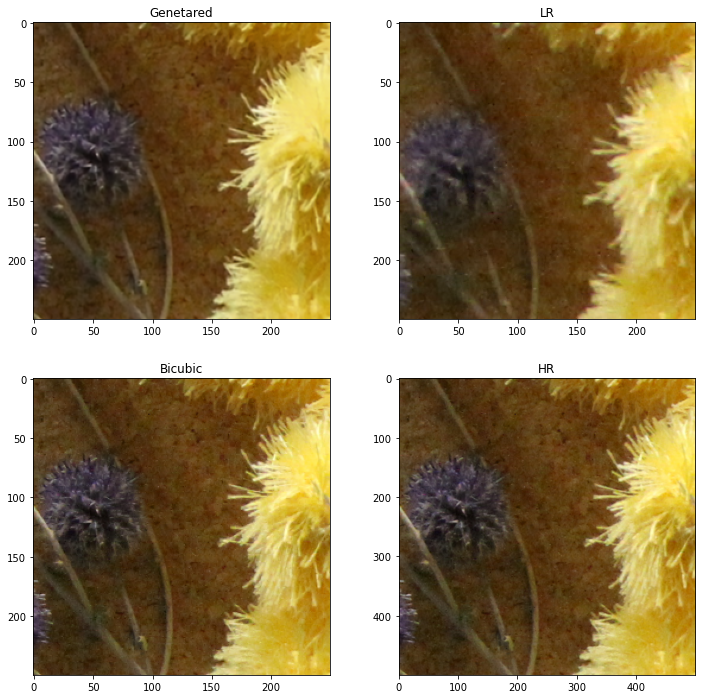

In [28]:
torch.cuda.empty_cache()

board_HR = cv.imread('./board_HR.png')[500:1000, 500:1000 , ::-1] / 255
inp = torch.tensor(my_utils.get_in(board_HR)).float()
inp = inp.resize(1, inp.size(0), inp.size(1), inp.size(2))
HR_inp = my_utils.add_noise(inp, [inp.size(2), inp.size(3)]).to(device)


torch.cuda.empty_cache()

board_HR = cv.imread('./board_HR.png')[500:1000, 500:1000 , ::-1] / 255

board_BC = np.clip(cv.resize(board_HR, (np.shape(board_HR)[0] // 2, np.shape(board_HR)[1] // 2), interpolation=cv.INTER_CUBIC),0 , 1)
inp = torch.tensor(my_utils.get_in(board_HR)).float()
inp = inp.resize(1, inp.size(0), inp.size(1), inp.size(2))

HR_inp = my_utils.add_noise(inp, [inp.size(2), inp.size(3)]).to(device)

lr_board = cv.imread('./board.png')[250:500, 250:500 , ::-1] / 255

out = [my_utils.get_out(testGAN.generator(HR_inp).detach().cpu().numpy()[0]), lr_board, board_BC, board_HR]
legend = ['Genetared', 'LR', 'Bicubic', 'HR']
_, axs = plt.subplots(ncols=len(out) // 2, nrows=len(out) // 2, figsize=(12, 12))
for i in range(len(out) // 2):
    for j in range(len(out) // 2):
        axs[i][j].imshow((out[j + i * (len(out) // 2)]))
        axs[i][j].grid(False)
        axs[i][j].set_title(legend[j + i * (len(out) // 2)])
plt.show()

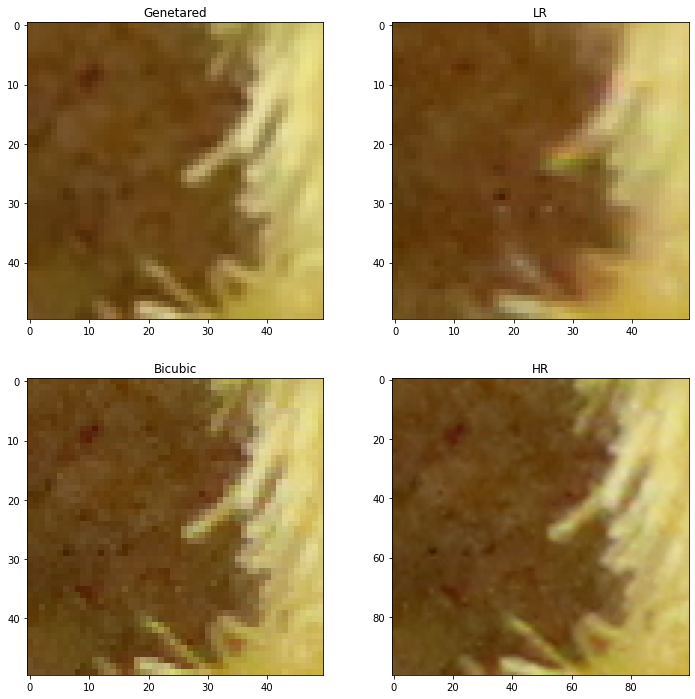

In [36]:
torch.cuda.empty_cache()

board_HR = cv.imread('./board_HR.png')[800:900, 800:900 , ::-1] / 255
inp = torch.tensor(my_utils.get_in(board_HR)).float()
inp = inp.resize(1, inp.size(0), inp.size(1), inp.size(2))
HR_inp = my_utils.add_noise(inp, [inp.size(2), inp.size(3)]).to(device)


torch.cuda.empty_cache()

board_HR = cv.imread('./board_HR.png')[800:900, 800:900 , ::-1] / 255

board_BC = np.clip(cv.resize(board_HR, (np.shape(board_HR)[0] // 2, np.shape(board_HR)[1] // 2), interpolation=cv.INTER_CUBIC),0 , 1)
inp = torch.tensor(my_utils.get_in(board_HR)).float()
inp = inp.resize(1, inp.size(0), inp.size(1), inp.size(2))

HR_inp = my_utils.add_noise(inp, [inp.size(2), inp.size(3)]).to(device)

lr_board = cv.imread('./board.png')[415:465, 400:450 , ::-1] / 255

out = [my_utils.get_out(testGAN.generator(HR_inp).detach().cpu().numpy()[0]), lr_board, board_BC, board_HR]
legend = ['Genetared', 'LR', 'Bicubic', 'HR']
_, axs = plt.subplots(ncols=len(out) // 2, nrows=len(out) // 2, figsize=(12, 12))
for i in range(len(out) // 2):
    for j in range(len(out) // 2):
        axs[i][j].imshow((out[j + i * (len(out) // 2)]))
        axs[i][j].grid(False)
        axs[i][j].set_title(legend[j + i * (len(out) // 2)])
plt.show()